# SWD 6 Notebook 1: Profiling code in Jupyter/Colab

In [ ]:
!pip install line_profiler

In [ ]:
# Using cProfile

def recip_square(i):
    return 1./i**2

def approx_pi(n=10000000):
    val = 0.
    for k in range(1,n+1):
        val += recip_square(k)
    return (6 * val)**.5

In [ ]:
%timeit approx_pi()

1 loop, best of 5: 4.17 s per loop


In [ ]:
%prun approx_pi()

In [ ]:
# We know that there's a lot of overhead in a function call, 
# so remove that call to the second function.

def approx_pi2(n=10000000):
    val = 0.
    for k in range(1,n+1):
        val += 1./k**2
    return (6 * val)**.5

In [ ]:
%timeit approx_pi2()

1 loop, best of 5: 3.43 s per loop


In [ ]:
%prun approx_pi2()

In [ ]:
def primes(n=1000): 
    A = [True] * (n+1)
    A[0] = False
    A[1] = False
    for i in range(2, int(n**0.5)):
        if A[i]:
            for j in range(i**2, n+1, i):
                A[j] = False

    return [x for x in range(2, n) if A[x]]

In [ ]:
# Load line_profiler in Notebook
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [ ]:
# Run line_profiler as notebook magic function
# This allows a Jupyter notebook to profile an individual function 
%lprun -f primes primes(10000)

The line profiler will display some information about the execution, including the line “Timer unit:” which gives the conversion factor to seconds for time information. It then shows a table with the following column headings (from left to right):

* Line # - The line number in the code
* Hits - The number of times that line was executed
* Time - The total amount of time spent executing the line in the timer’s units
* Per Hit - The average amount of time spent executing the line once in the timer’s unit
* % Time - The percentage of time spent on that line relative to the total amount of recorded time spent in the function
* Line Contents - The actual source code of the line

From the output, you can see that most of the time was spent at lines 7 and 8, and also at line 10. If we are to improve the performance of this function, then we should focus on these lines.

To profile a code, each function to be profiled will need a special decorator `@profile` added immediately above the function definition line.

We use a Jupyter magic function to now save this to disk to profile the code script rather than a function. 

In [ ]:
%%writefile primes.py
def primes(n=1000): 
    A = [True] * (n+1)
    A[0] = False
    A[1] = False
    for i in range(2, int(n**0.5)):
        if A[i]:
            for j in range(i**2, n+1, i):
                A[j] = False

    return [x for x in range(2, n) if A[x]]

Overwriting primes.py


In [ ]:
# Check it's there:
!ls

output.png  primes.stats   randomsearch.png    sample_data
primes.py   primes.stats2  randomsearch.stats


In [ ]:
# Run cProfile on this external file
!python -m cProfile primes.py

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 primes.py:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
# Run cProfile again but save the output to disk
!python -m cProfile -o primes.stats primes.py

In [ ]:
# and check what's been saved:
!ls

output.png  primes.stats   randomsearch.png    sample_data
primes.py   primes.stats2  randomsearch.stats


In [ ]:
# Run cProfile as notebook magic function again
# -D specifies the file into which the output file is saved
%prun -D primes.stats2 primes(10000)

 
*** Profile stats marshalled to file 'primes.stats2'. 


In [ ]:
# and see what has been saved
!ls

primes.py  primes.stats  primes.stats2	sample_data


In [ ]:
# Although snakeviz will work fine on a local computer it won't on Colab
# We can use gprof2dot instead

!pip install gprof2dot

  Created wheel for gprof2dot: filename=gprof2dot-2021.2.21-cp37-none-any.whl size=27763 sha256=90df976cdea41548d4610cea6cce9a418404eae5ca76762ff3a3a5008b74154f
  Stored in directory: /root/.cache/pip/wheels/38/15/69/175d7bf13733912b9019ea2f376d5c6e8e20df1f69de0c66a9
Successfully built gprof2dot


In [ ]:
# Now attempt to use gprof2dot to visualise the output from cProfile saved earlier
!ls

primes.py  primes.stats  primes.stats2	sample_data


In [ ]:
!gprof2dot -f pstats primes.stats | dot -Tpng -o output.png

In [ ]:
!gprof2dot -f pstats primes.stats

digraph {
	graph [fontname=Arial, nodesep=0.125, ranksep=0.25];
	node [fontcolor=white, fontname=Arial, height=0, shape=box, style=filled, width=0];
	edge [fontname=Arial];
	0 [color="#ff0000", fontcolor="#ffffff", fontsize="10.00", label="~:0:<built-in method builtins.exec>\n100.00%\n(50.00%)\n1×", tooltip="~"];
	0 -> 2 [arrowsize="0.71", color="#0ab60a", fontcolor="#0ab60a", fontsize="10.00", label="50.00%\n1×", labeldistance="2.00", penwidth="2.00"];
	2 [color="#0ab60a", fontcolor="#ffffff", fontsize="10.00", label="primes:1:<module>\n50.00%\n(50.00%)\n1×", tooltip="primes.py"];
}


In [ ]:
!ls

output.png  primes.py  primes.stats  primes.stats2  sample_data


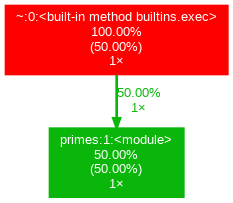

In [ ]:
# Now view the output.png file
from IPython.display import Image
Image('output.png')

In [ ]:
# Code to test dot visualization
import random
# Simple function to print messages 
def print_msg():
    for i in range(10):
        print("Program completed")

# Generate random data
def generate():
    data = [random.randint(0, 99) for p in range(0, 1000)]
    return data

# Function to search 
def search_function(data):
    for i in data:
        if i in [100,200,300,400,500]:
            print("success")

def main():
    data=generate()
    search_function(data)
    print_msg()

In [ ]:
%prun -D randomsearch.stats main()

Program completed
Program completed
Program completed
Program completed
Program completed
Program completed
Program completed
Program completed
Program completed
Program completed
 
*** Profile stats marshalled to file 'randomsearch.stats'. 


In [ ]:
!gprof2dot -f pstats randomsearch.stats | dot -Tpng -o randomsearch.png

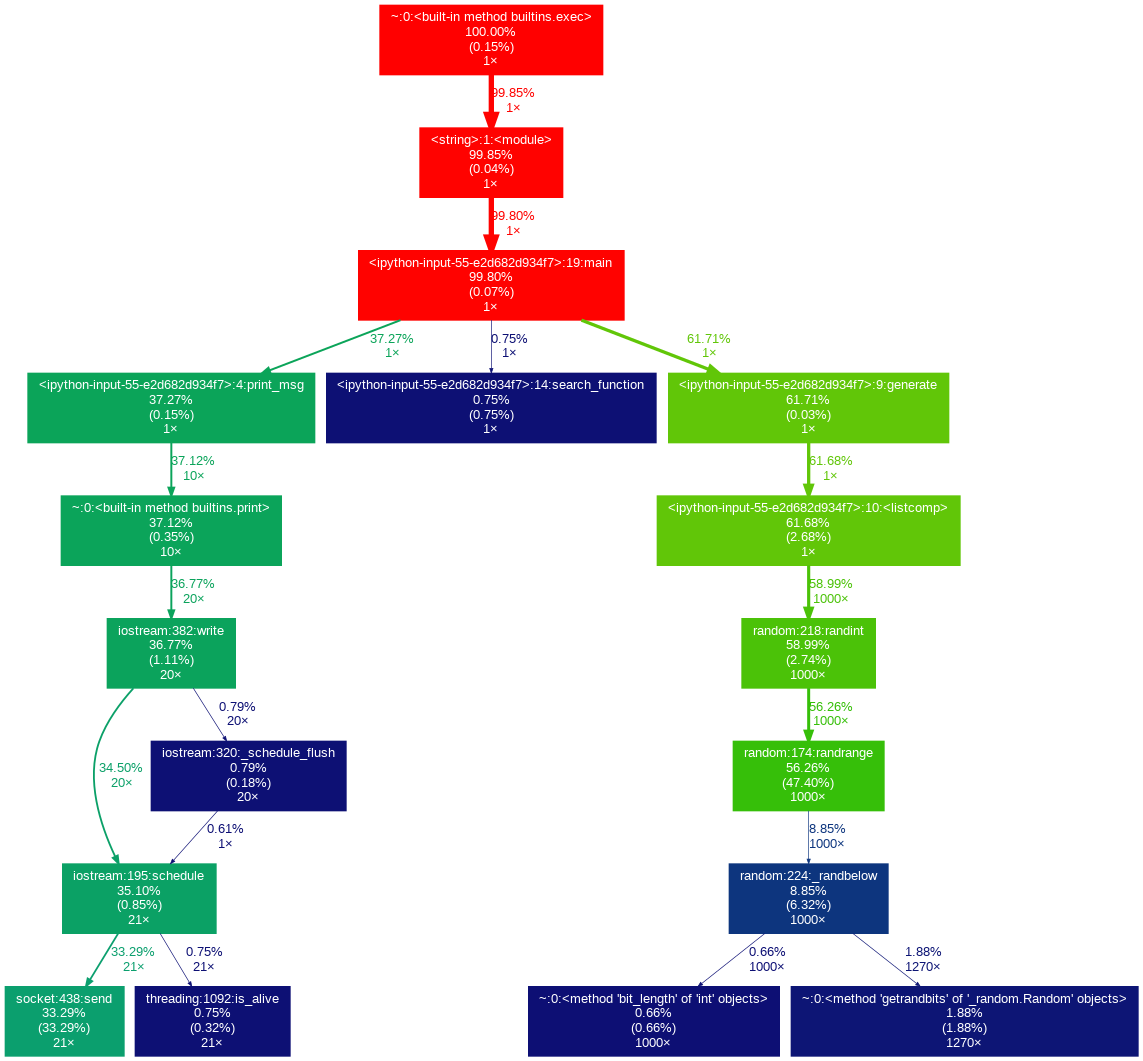

In [ ]:
Image('randomsearch.png')